First of all we would like to have a look at some general information regarding the Hobbyist respondents. Specifically:
- What is the baseline percentage of resondents who code as a hobby
- Are any of Age, Gender or Location determining factors in whether people code as a hobby or not

Lets import the necessary libraries and the data first

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

df = pd.read_csv('./survey_results/2020/survey_results_public.csv')
schema = pd.read_csv('./survey_results/2020/survey_results_schema.csv')

df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [24]:
hobbyist_df = df[df['Hobbyist'] == 'Yes']
not_hobbyist_df = df[df['Hobbyist'] == 'No']
hobbyists = hobbyist_df.shape[0]
not_hobbyists = not_hobbyist_df.shape[0]
baseline = "{:.2f}".format(hobbyists/(hobbyists + not_hobbyists))
print(f'There are {hobbyists} hobbyist developers, and {not_hobbyists} who are not. This gives a baseline proportion of {baseline}')

There are 50388 hobbyist developers, and 14028 who are not. This gives a baseline proportion of 0.78


From our baseline statistic we can see that 78% of respondents do code as hobby, which is a pretty high proportion!

Text(0, 0.5, 'Count')

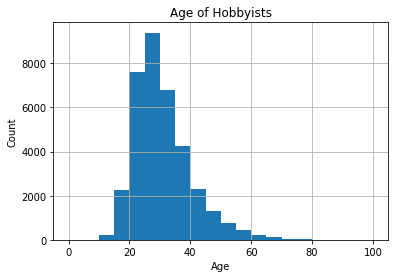

In [3]:
hobbyist_df['Age'].hist(bins=list(range(0,101,5)))
plt.title('Age of Hobbyists')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

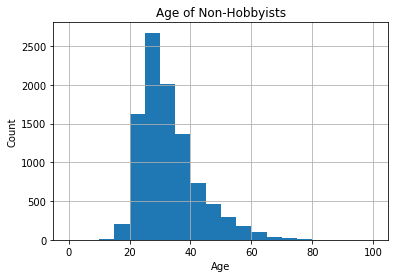

In [4]:
not_hobbyist_df['Age'].hist(bins=list(range(0,101,5)))
plt.title('Age of Non-Hobbyists')
plt.xlabel('Age')
plt.ylabel('Count')

Above we can see that the shape of the distributions is almost exactly the same for both groups. Therefore age does not appear to be strongly correlated with whether or not someone programs as a hobby. I was expecting to see a skew of the non-hobbyists toward the 'older' age groups, however it appears this isn't the case.

Text(0, 0.5, 'Proportion')

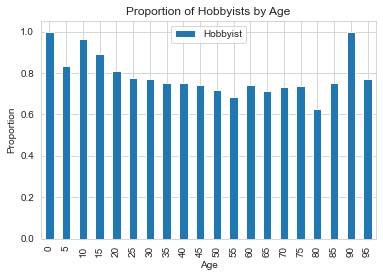

In [93]:
df['Age_bin'], bins = pd.cut(df['Age'], bins=list(range(0,101,5)), retbins=True)
age_bin_df = df[['Age_bin', 'Hobbyist']].copy()
age_bin_df['Hobbyist'].replace(to_replace={'Yes':1, 'No':0}, inplace=True)
age_agg_df = age_bin_df.groupby('Age_bin').mean()
age_agg_df.index.categories = bins[:-1]
age_agg_df.plot.bar()
plt.title('Proportion of Hobbyists by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')

To confirm that age isn't a determining factor, and that findings weren't hidden by the y-axis scale caused by the comparatively large peak of younger age groups, the chart above is the proportion of individuals who code a hobby in each 5 year age group bin. It is quite clear that the bars remain fairly consistent in height, hovering around our baseline 78%, which supports our earlier conclusion.

In [127]:
hobbyist_gender_val_counts = hobbyist_df['Gender'].value_counts()
total_gender_val_counts = df['Gender'].value_counts()
men_prop = "{:.2f}".format(hobbyist_gender_val_counts['Man'] / total_gender_val_counts['Man'])
women_prop = "{:.2f}".format(hobbyist_gender_val_counts['Woman'] / total_gender_val_counts['Woman'])
print(f"The proportion of 'Men' who code as a hobby is {men_prop}")
print(f"The proportion of 'Women' who code as a hobby is {women_prop}")
total_other = np.sum(df[(df['Gender'] != 'Man') & (df['Gender'] != 'Woman')]['Gender'].value_counts())
other = np.sum(hobbyist_df[(hobbyist_df['Gender'] != 'Man') & (hobbyist_df['Gender'] != 'Woman')]['Gender'].value_counts())
other_prop = "{:.2f}".format(other / total_other)
print(f"The proportion of everyone else who code as a hobby is {other_prop}")


The proportion of 'Men' who code as a hobby is 0.80
The proportion of 'Women' who code as a hobby is 0.61
The proportion of everyone else who code as a hobby is 0.82


Here we see that approximately 4 in 5 Men, and the same for those who do not identify as "Man" or "Woman", code as a hobby. Comparatively, 3 in 5 Women code as a hobby. 

Text(0, 0.5, 'Count')

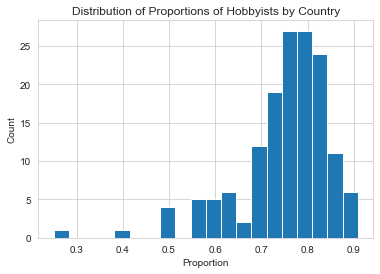

In [138]:
country_df = df[['Country','Hobbyist']].copy()
country_df['Hobbyist'].replace(to_replace={'Yes':1, 'No':0}, inplace=True)
country_agg_df = country_df.groupby('Country').mean()
country_agg_df[(country_agg_df['Hobbyist'] < 0.98) & (country_agg_df['Hobbyist'] > 0.02)].hist(bins=20);
plt.title('Distribution of Proportions of Hobbyists by Country')
plt.xlabel('Proportion')
plt.ylabel('Count')

Dividing the data up by Country, and ignoring extreme vales 0.0 and 1.0 as they are caused by very low numbers of respondents from those locations, we can see that again our distribution of proportions is centered around the baseline and does not deviate much beyond +/- 10% in most cases. So it seems Country is not a reliable indicator of whether someone codes as a hobby or not either.

In conclusion, both Age and Location appear to not be very useful in determining if someone codes as a hobby. A persons 'Gender' may be slightly more useful, but also not a great differentiator. 